# 기본적인 통계 개념 및 표본 통계

__2장 - 단순 비교 실험__
- 기본적인 통계 개념
- 표본 추출과 표본 분포
- 평균 차이에 대한 추정, 랜덤화 설계
- 평균 차이에 대한 추정, 쌍체비교 설계
- 정규분포의 분산의 추정

In [18]:
import pandas as pd

# 데이터 수동 입력
data = {
    '수정된 물타르 (y1)': [16.85, 16.40, 17.21, 16.35, 16.52, 17.04, 16.96, 17.15, 16.59, 16.57],
    '수정되지 않은 물타르 (y2)': [16.62, 16.75, 17.37, 17.12, 16.98, 16.87, 17.34, 17.02, 17.08, 17.27]
}

# 데이터프레임으로 변환
df = pd.DataFrame(data)

# 데이터프레임 출력
df

,수정된 물타르 (y1),수정되지 않은 물타르 (y2)
0,16.85,16.62
1,16.40,16.75
2,17.21,17.37
3,16.35,17.12
4,16.52,16.98
5,17.04,16.87
6,16.96,17.34
7,17.15,17.02
8,16.59,17.08
9,16.57,17.27


## 기본적인 통계 개념

수행(Run): 관측치  
실험 오차(Experimental error): 관측치와 실제 값이 다른 정도  
확률변수(Random variable): 실험의 가능한 결과를 수치적으로 표현하며, 각각의 가능한 결과에 특정 확률이 할당된 변수라고 표현
- 이산형 확률변수(Discrete random variable): 결과가 유한하거나 값을 셀 수 있는 변수
- 연속형 확률변수(Continuous random variable): 셀 수 없으며, 무한한 값을 가지고 있으며 실수 범위 내의 모든 값에서 어떤 값이든 결과가 나올 수 있는 경우

### 그래프 표현

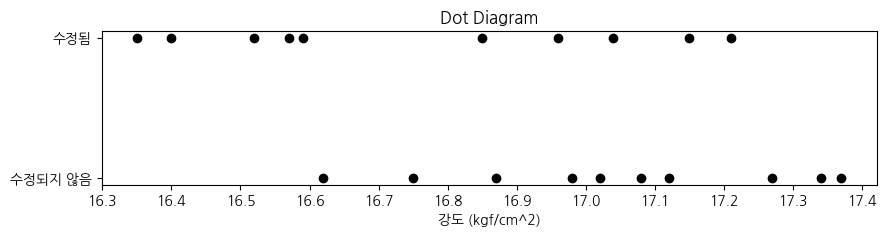

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# Y축 위치 설정 (각 그룹을 나누기 위해 각각의 위치 지정)
y1_pos = np.ones(len(df['수정된 물타르 (y1)'])) * 1  # 수정된 물타르
y2_pos = np.ones(len(df['수정되지 않은 물타르 (y2)'])) * 0  # 수정되지 않은 물타르

# 그래프 그리기
plt.figure(figsize=(10, 2))

# 점도표 (수정된 물타르)
plt.plot(df['수정된 물타르 (y1)'], y1_pos, 'ko', label='수정된 물타르')  # 'ko'는 검은색 점

# 점도표 (수정되지 않은 물타르)
plt.plot(df['수정되지 않은 물타르 (y2)'], y2_pos, 'ko', label='수정되지 않은 물타르')  # 'ko'는 검은색 점

# X축 라벨
plt.xlabel('강도 (kgf/cm^2)')
plt.xticks(np.arange(16.3, 17.5, 0.1))  # X축 범위 설정

# Y축 숨기기 (수평점도를 위해)
plt.yticks([0, 1], ['수정되지 않음', '수정됨'])

# 그래프 타이틀
plt.title('Dot Diagram')

# 그래프 출력
plt.show()

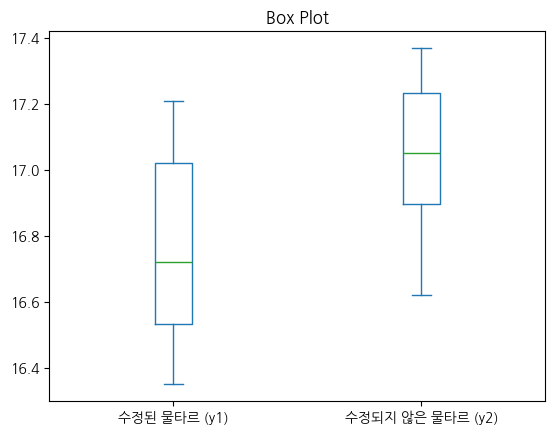

In [20]:
df.plot.box()
plt.title('Box Plot')
plt.show()

### 확률분포(Probability Distribution)

__확률질량함수(Probability mass function)__
- $p(y)$ == 확률
- 확률분포 $y$가 이산형인 경우

__확률밀도함수(Probability density function)__
- $f(y) \neq$ 확률
    - 일정 구간에 대해서만 확률이 주어진다.
- 확률분포 $y$가 연속형인 경우

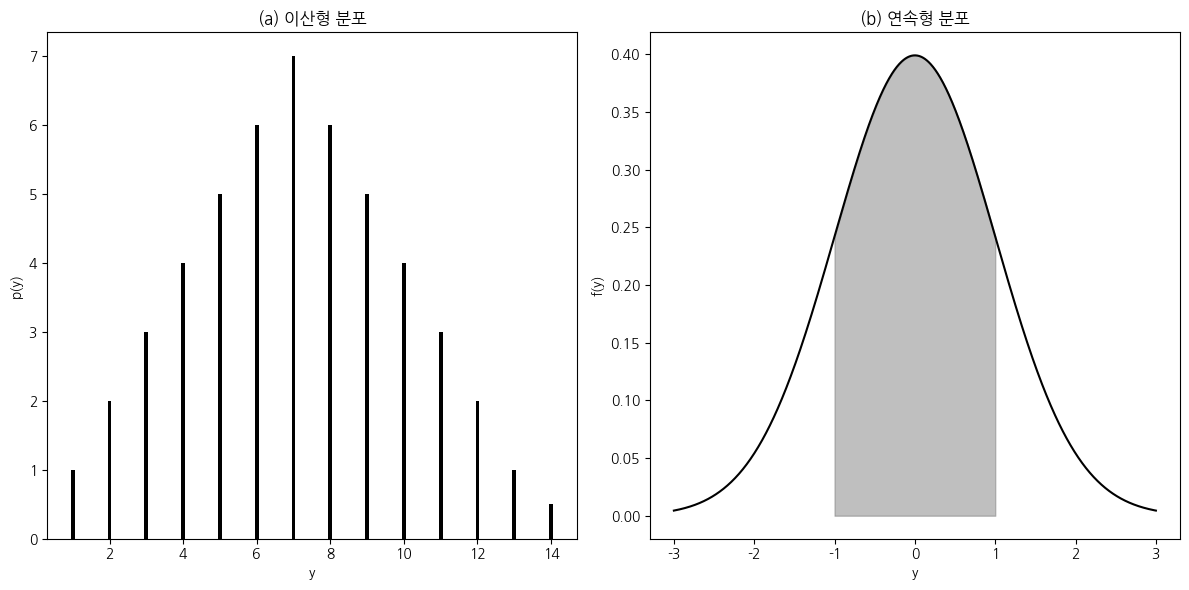

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. 이산형 분포 (Discrete Distribution)
y_values = np.arange(1, 15)
p_values = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0.5])  # 임의의 확률 값

plt.figure(figsize=(12, 6))

# 이산형 분포 (왼쪽 그래프)
plt.subplot(1, 2, 1)
plt.bar(y_values, p_values, color='black', width=0.1)
plt.xlabel('y')
plt.ylabel('p(y)')
plt.title('(a) 이산형 분포')

# 2. 연속형 분포 (Continuous Distribution)
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x, 0, 1)

plt.subplot(1, 2, 2)
plt.plot(x, y, color='black')

# 구간 a, b의 음영 처리
a, b = -1, 1
x_fill = np.linspace(a, b, 1000)
y_fill = norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.5)

plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('(b) 연속형 분포')

# 그래프 출력
plt.tight_layout()
plt.show()

### 평균, 분산, 기대값

__평균 및 기대값__

$$
\mu = E(y) = 
\begin{cases} 
\int_{-\infty}^{\infty} y f(y)\, dy & \text{y가 연속형} \\
\sum_{\text{모든 y}} y p(y_j) & \text{y가 이산형}
\end{cases}
$$

__분산__

$$
\sigma^2 =
\begin{cases}
\int_{-\infty}^{\infty}(y-\mu)^2 f(y)\ dy & \text{y가 연속형}\\
\sum_{\text{모든 y}} (y-\mu)^2 p(y_j) & \text{y가 이산형}
\end{cases}
$$

$$
\sigma^2 = E[(y-\mu)^2] = V(y)=E[(y-\mu)^2]=\sigma^2
$$

$$
V(y_1 + y_2)=V(y_1) + V(y_2) + 2Cov(y_1, y_2) \\
Cov(y_1, y_2) = E[(y_1 - \mu_1)(y_2 - \mu_2)]
$$

### 표본추출과 표본분포

__표본평균__
- 모평균 $\mu$의 점추정량
- 불편추정량(Unbiased estimator): 점추정량의 장기평균이 추정하려는 모수와 같아야 한다.
    - 표본추출을 여러 번 해서 각각 평균을 낸 다음 전체 평균을 낸 것이 장기평균
- 최소분산(Minimum variance): 모수의 어떤 다른 추정치의 분산보다도 작은 분산을 가지고 있어야 한다.

$$
\bar{y} = \frac{\sum_{i=1}^{n}y_i}{n}
$$

__표본분산__
- 모분산 $\sigma^2$의 점추정량
- 불편추정량, 최소분산 해당

$$
S^2 = \frac{\sum_{i=1}^{n}(y_i-\bar{y})^2}{n-1}
$$

__자유도__
- 데이터에 있는 독립적인 값의 수
- 표본 내에서 자유롭게 변할 수 있는 값의 수
- 예: 표본 평균을 계산할 때, 표본 크기가 $n$이면, 마지막 값은 나머지 $n-1$개의 값으로부터 결정된다.

__표본분포__
- 모집단에서 동일한 크기의 표본을 여러 번 추출해서 계산한 __통계량의__ 확률분포

__정규분포__
- 데이터가 평균을 중심으로 대칭적인 종 모양의 분포를 따르는 확률분포
- 다양한 통계 방법론이 정규분포를 가정한다.

$$
f(y)= \frac{1}{\sigma \sqrt{2\pi}} \exp(-(1/2)[(y-\mu)/\sigma]^2),\ -\infty < y < \infty
$$

__표준정규분포__
- 평균이 0이고 분산이 1인 특수한 정규분포.
- $z=\frac{y-\mu}{\sigma}$

__중심극한정리__
- 표본평균의 분포가 표본 크기가 충분히 클 때, 모집단의 분포와 상관없이 정규분포를 대략적으로 따른다는 이론이다.

__카이제곱분포__
- 표본분산이 모집단의 분산과 얼마나 차이가 나는지 평가할 때 활용한다.
- 두 범주형 변수 사이에 독립성이 있는지 평가할 때도 사용한다.
- 자유도가 커질수록 정규분포로 근사한다.

__t 분포__
- 모집단의 평균을 추정할 때 활용한다.
- 표본의 크기가 작거나 모집단의 분산을 알 수 없을 때 유용하다. 
- 정규분포와 유사하지만, 자유도에 따라 분포의 모양이 달라진다.

__F 분포__
- 두 모집단의 분산을 비교할 때 활용한다.
- 두 개의 카이제곱분포를 서로 나눈 분포의 형태이다.